In [1]:
import pandas as pd
import re
import seaborn as sns
import string
from underthesea import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
# model libralies
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import BaggingClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv('./data/vnexpress_data.csv')
df

,label,title,abstract,content,author,date
0,thoi_su,"Nhà nứt, vườn xuất hiện hố sâu sau tiếng động ...","Hà TĩnhSau tiếng động mạnh, nền nhà hai hộ dân...","Khoảng 20h30 ngày 23/11, ông Nguyễn Duy Hùng đ...",Đức Hùng,24/11/2023
1,thoi_su,Người nuôi lợn trắng tay vì dịch bệnh,"Xã Xuân Đông, huyện Chợ Gạo hiện là ổ dịch tả ...","Trưa tháng 11, đang cao điểm dịch bệnh các ngõ...",Hoàng Nam,24/11/2023
2,thoi_su,Kiến nghị sớm khởi động đàm phán tăng lương tố...,Công đoàn cho rằng Hội đồng tiền lương quốc gi...,Tại phiên đầu tiên vào tháng 8 bàn về tiền lươ...,Hồng Chiêu,24/11/2023
3,thoi_su,Sông Lam 'ngoạm' bờ cả nghìn mét,"Nghệ AnSông Lam đoạn qua xã Lạng Sơn, huyện An...","Chiều giữa tháng 11, bà Nguyễn Thị Tín, 53 tuổ...",Đức Hùng,24/11/2023
4,thoi_su,Ý kiến trái chiều về sát hạch người lái xe dướ...,Nhiều chuyên gia ủng hộ đề xuất sát hạch người...,"Tại Quốc hội sáng 21/11, đại biểu Lý Thị Lan, ...",Đoàn Loan,24/11/2023
...,...,...,...,...,...,...
2319,suc_khoe,10 đồ uống có lợi cho người bệnh thận,"Nước chanh, nước ép cà rốt, trà thảo mộc cung ...",Thận yếu (thận hư) khi không đảm bảo tốt các c...,Kim Thành,23/11/2023
2320,suc_khoe,Tại sao khô miệng?,"Thuốc, tổn thương dây thần kinh, bệnh tiểu đườ...",Khô miệng là tình trạng miệng tiết ra ít hoặc ...,Anh Chi,23/11/2023
2321,suc_khoe,Mãn kinh sớm do suy buồng trứng,TP HCMChị Hòa mãn kinh ở tuổi 35 do suy buồng ...,Xét nghiệm nội tiết của chị cho thấy chỉ số ho...,Tuệ Diễm,23/11/2023
2322,suc_khoe,Tĩnh mạch suy giãn nổi ngoằn ngoèo trên chân,"TP HCMBà Sinh, 68 tuổi, suy giãn tĩnh mạch châ...","Bà Sinh đã khám ở nhiều nơi, bác sĩ chỉ định c...",Thu Hà,23/11/2023


In [4]:
df.isnull().sum()

label        0
title        0
abstract     0
content      0
author      75
date         0
dtype: int64

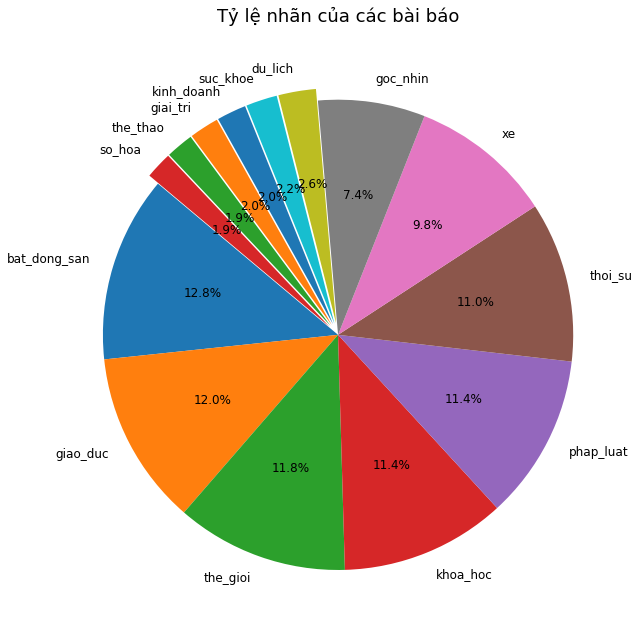

bat_dong_san    297
giao_duc        278
the_gioi        275
khoa_hoc        264
phap_luat       264
thoi_su         256
xe              228
goc_nhin        171
du_lich          60
suc_khoe         50
kinh_doanh       47
giai_tri         47
the_thao         44
so_hoa           43
Name: label, dtype: int64


In [5]:
total = len(df)
label_counts = df['label'].value_counts()
percentages = label_counts/total * 100

# Create a pie chart with custom colors and explode parameter
plt.figure(figsize=(9, 9))
plt.pie(
    percentages,
    labels=label_counts.index,
    autopct=lambda p: f'{p:.1f}%',
    startangle=140,
    textprops={'fontsize': 12},
    explode=(0,0,0,0,0,0,0,0,0.05,0.05,0.05,0.05,0.05,0.05))

# Equal aspect ratio ensures that the pie is drawn as a circle
plt.axis('equal')
# Add a title
plt.title("Tỷ lệ nhãn của các bài báo", fontsize=18)
# Show the plot
plt.tight_layout()
plt.show()

print(df['label'].value_counts()) 

In [6]:
authors = df['author'].unique()
author_count = len(df['author'].unique())
print(f'Count of author: {author_count}')
print(f'Authors: {authors.tolist()}')
top10_author = df['author'].value_counts()[0:10]
print(f'Top 10 authors: \n{top10_author}')

Count of author: 450
Authors: ['Đức Hùng', 'Hoàng Nam', 'Hồng Chiêu', 'Đoàn Loan', 'Nguyễn Đông', 'Sơn Hà', 'Đình Văn', 'Trường Hà', 'Viết Tuân', 'Viết Tuân - Gia Chính', 'Gia Chính', 'Hạ Giang', 'Ngọc Thành - Việt An', 'Bùi Toàn', 'Vy An - Lê Hoàng - Đức Hùng', 'Phạm Linh', 'Lê Tân', 'Anh Duy', 'Gia Minh', 'Quỳnh Trần', 'Việt An', 'Võ Hải', 'Võ Thạnh', 'An Minh', 'An Bình - Đắc Thành', 'Nhóm phóng viên', 'Tư Huynh - Phạm Linh - Đăng Khoa', 'Lê Tuyết', 'Khánh Hương – Trường Hà', 'Ngọc Tài', 'Phước Tuấn', 'Đức Hùng - Phước Tuấn', 'Báo tiếng Việt nhiều người xem nhất', 'Ngọc Oanh', 'Đắc Thành', 'Lê Tuyết – Khương Nha', 'Phạm Linh - Trần Hóa - Bùi Toàn', 'Ngọc Trường', 'Tư Huynh', 'Võ Thạnh - Văn Đông', 'Vy An', 'Phạm Linh - Đắc Thành', 'Bùi Toàn - Phạm Linh', 'Phước Tuấn - Yên Khánh', 'Đức Hùng - Nguyễn Đông', 'Thanh Hằng', 'Phạm Chiểu - Ngọc Thành', 'An Bình ', 'Quỳnh Trần - Đình Văn', 'Thanh Tùng - Gia Minh', 'Đình Văn - Gia Minh', 'Ái Trinh', 'Phạm Chiểu', 'Quỳnh Trần - Phong Anh', 'L

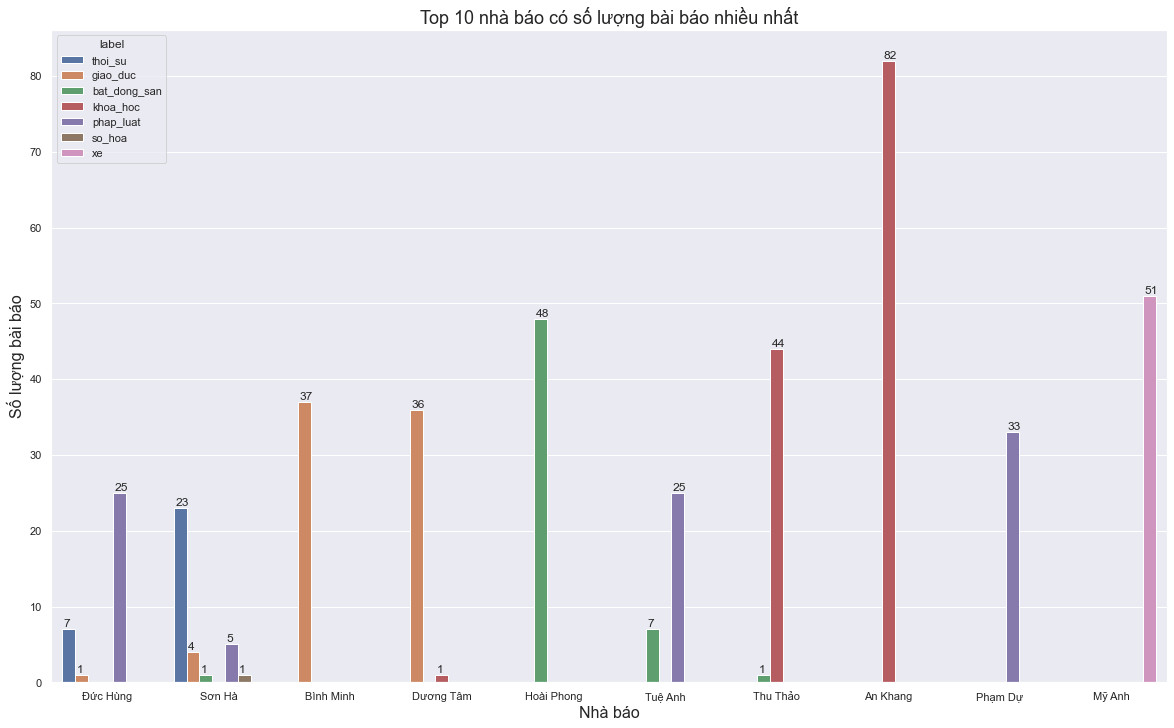

In [7]:
top10_author_df = df[df['author'].isin(top10_author.index)]

sns.set(rc = {'figure.figsize':(20, 12)})
a = sns.countplot(x='author', hue='label', data=top10_author_df)
a.set_title('Top 10 nhà báo có số lượng bài báo nhiều nhất', fontsize=18)
a.set_xlabel("Nhà báo", fontsize=16)
a.set_ylabel("Số lượng bài báo", fontsize=16)
# show values on top of countplot
for p in a.patches:
   a.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+p.get_width()/9, p.get_height()+0.3))
   
plt.show()

In [3]:
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')
df['date'].sort_values(ascending=False).reset_index()

,index,date
0,0,2023-11-24
1,2003,2023-11-24
2,625,2023-11-24
3,1679,2023-11-24
4,1680,2023-11-24
...,...,...
2319,785,2023-08-22
2320,786,2023-08-21
2321,787,2023-08-20
2322,788,2023-08-19


In [9]:
df['date'].value_counts()

2023-11-23    202
2023-11-21    142
2023-11-22    138
2023-11-16    107
2023-11-17    104
             ... 
2023-09-18      1
2023-09-17      1
2023-09-16      1
2023-09-14      1
2023-08-17      1
Name: date, Length: 92, dtype: int64

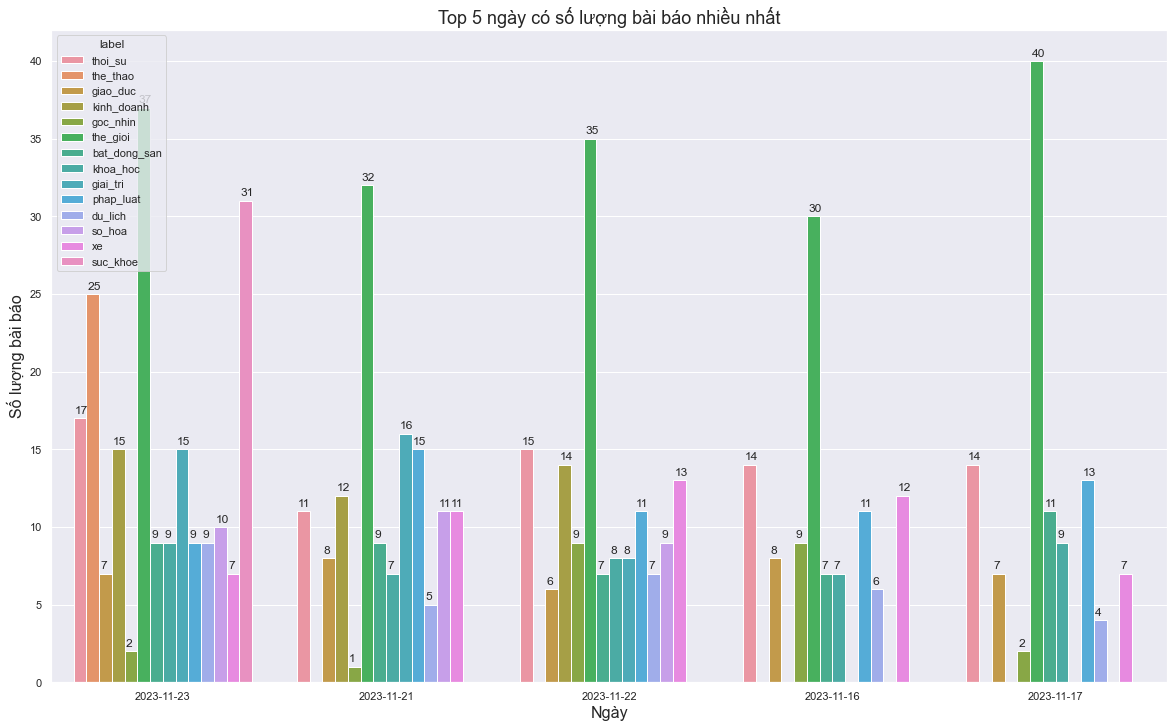

In [10]:
top5_dates = df['date'].dt.date.value_counts()[0:5].index
top5_dates_df = df[df['date'].isin(top5_dates)]

sns.set(rc = {'figure.figsize':(20, 12)})
a = sns.countplot(x='date', hue='label', data=top5_dates_df)
a.set_title('Top 5 ngày có số lượng bài báo nhiều nhất', fontsize=18)
a.set_xlabel("Ngày", fontsize=16)
a.set_xticklabels(top5_dates)
a.set_ylabel("Số lượng bài báo", fontsize=16)
# show values on top of countplot
for p in a.patches:
   a.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+p.get_width()/9, p.get_height()+0.3))
   
plt.show()

In [4]:
df['length_of_content'] = df['content'].apply(len)
df['length_of_content'].describe()

count     2324.000000
mean      2831.834337
std       1860.009057
min          1.000000
25%       1647.750000
50%       2425.000000
75%       3904.500000
max      14587.000000
Name: length_of_content, dtype: float64

In [408]:
# min length of content
min_content_df = df[df['length_of_content']==1]
min_content_df['content'].tolist()

['\n']

In [12]:
# drop row content = '\n'
df = df[df['length_of_content'] != 1]
df.describe()

,length_of_content
count,2323.000000
mean,2833.052949
std,1859.481371
min,10.000000
25%,1650.000000
50%,2425.000000
75%,3906.000000
max,14587.000000


In [5]:
# drop row wrong content
df = df[df['length_of_content'] >= 60]
df.describe()

,length_of_content
count,2217.000000
mean,2967.553902
std,1796.225650
min,68.000000
25%,1759.000000
50%,2473.000000
75%,3966.000000
max,14587.000000


In [15]:
# max length of content
max_content_df = df[df['length_of_content'] == 14587]
max_content_df['content'].to_list()

['Sáng 7/11, Quốc hội dành hơn một giờ tiếp tục chất vấn nhóm lĩnh vực công thương; nông nghiệp và phát triển nông thôn; giao thông vận tải; xây dựng; tài nguyên và môi trường. Sau phiên họp chiều hôm trước, vẫn còn 60 đại biểu đăng ký chất vấn và tranh luận.\nĐại biểu Phạm Thúy Chinh (Phó chủ nhiệm Ủy ban Tài chính Ngân sách) tranh luận với Bộ trưởng Giao thông Vận tải về triển khai các dự án đầu tư theo hình thức đối tác công tư PPP. Bà chia sẻ với Bộ trưởng Nguyễn Văn Thắng về khó khăn trong thu hút nhà đầu tư, nhưng chưa đồng tình với giải pháp chỉ nâng vốn nhà nước tham gia dự án PPP để hấp dẫn nhà đầu tư tư nhân.\n"Quá tập trung vào nâng vốn nhà nước tham gia dự án PPP dễ trở thành một hình thái khác của đầu tư công", bà Chinh lo ngại và cho rằng Nhà nước cần cam kết thực hiện nghĩa vụ của mình như mua lại các dự án nếu có lỗi của Nhà nước; cam kết cân đối vốn; chia sẻ khi giảm doanh thu. Các vấn đề này đã được quy định chi tiết trong Luật Đối tác công tư.\nNgoài ra, bà Chinh cho

In [6]:
print(len(df))

2217


In [17]:
df.head()

,label,title,abstract,content,author,date,length_of_content
0,thoi_su,"Nhà nứt, vườn xuất hiện hố sâu sau tiếng động ...","Hà TĩnhSau tiếng động mạnh, nền nhà hai hộ dân...","Khoảng 20h30 ngày 23/11, ông Nguyễn Duy Hùng đ...",Đức Hùng,2023-11-24,909
1,thoi_su,Người nuôi lợn trắng tay vì dịch bệnh,"Xã Xuân Đông, huyện Chợ Gạo hiện là ổ dịch tả ...","Trưa tháng 11, đang cao điểm dịch bệnh các ngõ...",Hoàng Nam,2023-11-24,4365
2,thoi_su,Kiến nghị sớm khởi động đàm phán tăng lương tố...,Công đoàn cho rằng Hội đồng tiền lương quốc gi...,Tại phiên đầu tiên vào tháng 8 bàn về tiền lươ...,Hồng Chiêu,2023-11-24,4375
3,thoi_su,Sông Lam 'ngoạm' bờ cả nghìn mét,"Nghệ AnSông Lam đoạn qua xã Lạng Sơn, huyện An...","Chiều giữa tháng 11, bà Nguyễn Thị Tín, 53 tuổ...",Đức Hùng,2023-11-24,2919
4,thoi_su,Ý kiến trái chiều về sát hạch người lái xe dướ...,Nhiều chuyên gia ủng hộ đề xuất sát hạch người...,"Tại Quốc hội sáng 21/11, đại biểu Lý Thị Lan, ...",Đoàn Loan,2023-11-24,3933


In [7]:
with open('./vietnamese-stopwords.txt', encoding='utf8') as f:
    stopwords = f.readlines()
stopwords = [x.strip().replace(' ', '_') for x in stopwords]
print(f'Length of stopwords: {len(stopwords)}')
print(stopwords[0:20])

Length of stopwords: 2063
['a_lô', 'a_ha', 'ai', 'ai_ai', 'ai_nấy', 'ai_đó', 'alô', 'amen', 'anh', 'anh_ấy', 'ba', 'ba_ba', 'ba_bản', 'ba_cùng', 'ba_họ', 'ba_ngày', 'ba_ngôi', 'ba_tăng', 'bao_giờ', 'bao_lâu']


In [8]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [9]:
def data_clean(data):
    data = data.lower()
    data = word_tokenize(data, format="text")
    data = ''.join(char for char in data if char not in (string.punctuation.replace('_', '')))
    data = re.sub(r'\s+', ' ', data).strip()
    data = ' '.join(word for word in data.split() if word not in stopwords)
    
    return data

In [10]:
df['clean_content'] = df['content'].apply(data_clean)
df[['content', 'clean_content']].head()

C:\Users\letha\AppData\Local\Temp\ipykernel_1872\299636508.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_content'] = df['content'].apply(data_clean)


,content,clean_content
0,"Khoảng 20h30 ngày 23/11, ông Nguyễn Duy Hùng đ...",20 h30 2311 nguyễn_duy_hùng bốn tiếng_động vườ...
1,"Trưa tháng 11, đang cao điểm dịch bệnh các ngõ...",trưa 11 cao_điểm dịch_bệnh ngõ đường xã xuân_đ...
2,Tại phiên đầu tiên vào tháng 8 bàn về tiền lươ...,phiên 8 bàn tiền_lương tối_thiểu 2024 hội_đồng...
3,"Chiều giữa tháng 11, bà Nguyễn Thị Tín, 53 tuổ...",chiều 11 nguyễn_thị_tín 53 dân xóm 1_ xã lạng ...
4,"Tại Quốc hội sáng 21/11, đại biểu Lý Thị Lan, ...",quốc_hội 2111 đại_biểu lý thị lan phó đoàn hà ...


In [11]:
print(f"Original content: \n{df['content'][3]}")
print('---------------------------------------')
print(f"Clean content: \n{df['clean_content'][3]}")

Original content: 
Chiều giữa tháng 11, bà Nguyễn Thị Tín, 53 tuổi, cùng nhiều người dân xóm 1, xã Lạng Sơn ra chăng dây nylon tại các mảnh vườn rộng 200-400 m2 nằm sát sông Lam. Họ lo sợ đợt mưa sắp tới bờ sông sạt lở thêm, gây nguy hiểm.
Đang làm, đôi lúc bà Tín giật mình bởi nhiều tảng đất, đá đột ngột lăn xuống lòng sông, tạo những tiếng động lớn. Cách đó hơn 50 m, ở phía đối diện, nhiều sà lan đang hút cát dưới sông.
Bà Tín cho biết tình trạng sạt lở bờ sông Lam đoạn qua xóm 1 diễn ra gần 10 năm nay, song năm 2023 nghiêm trọng nhất. Gia đình bà trước đây có hơn 300 m2 đất vườn và đất ở nằm bên sông, gần mép nước có hàng tre bảo vệ. Nhưng 5 năm trước, hàng tre đã bị cuốn trôi, lòng sông ăn sâu vào vườn 20 m. Chuồng nuôi gia súc, gia cầm cũng bị kéo xuống nước.
Đầu tháng 10, sau các đợt mưa lớn kéo dài, nước từ thượng nguồn đổ về, nước sông Lam dâng cao. Khi nước rút kéo theo sạt lở, nhà bà Tín tiếp tục mất hàng chục mét vuông đất. "Điểm sạt hiện chỉ cách nhà tôi khoảng 10 m. Cứ thế

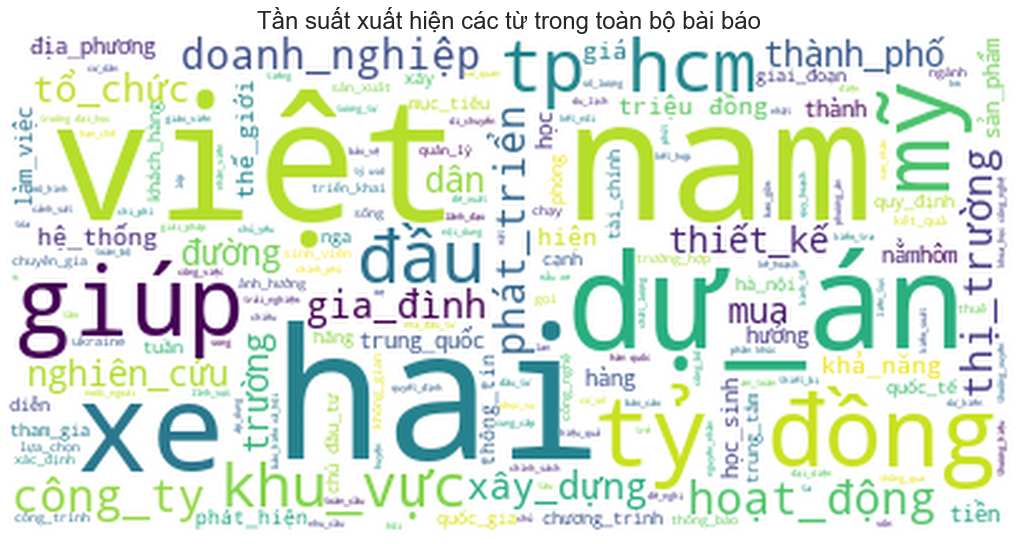

In [23]:
# wordcloud for all clean content
all_content = ' '.join(df['clean_content'])  
plt.figure(figsize=(18, 18))
plt.title("Tần suất xuất hiện các từ trong toàn bộ bài báo", fontsize = 24)
plt.imshow(WordCloud(background_color = 'white').generate(all_content), interpolation='lanczos')
plt.axis('off')
plt.show()

In [12]:
module_count_vector = CountVectorizer()
data_preprocess = Pipeline([('vect', module_count_vector), 
                            ('tfidf', TfidfTransformer())])

# feature extraction
data_preprocessed = data_preprocess.fit_transform(df['clean_content'], df['label'])

In [14]:
# save data_preprocess method
with open('data_preprocess_method.pkl', 'wb') as f:
    pickle.dump(data_preprocess, f)

In [ ]:
print(data_preprocessed.shape)
module_count_vector.vocabulary_.items()

In [15]:
# split data
X_train, X_test, y_train, y_test = train_test_split(data_preprocessed, df['label'], 
                                                    test_size=0.3, shuffle=True, random_state=42)

In [16]:
# encode label
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print(list(label_encoder.classes_))

y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)

['bat_dong_san', 'du_lich', 'giai_tri', 'giao_duc', 'goc_nhin', 'khoa_hoc', 'kinh_doanh', 'phap_luat', 'so_hoa', 'suc_khoe', 'the_gioi', 'the_thao', 'thoi_su', 'xe']


In [17]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1551, 31669)
(1551,)
(666, 31669)
(666,)


In [29]:
# build function trainning binary classification model
def train_classification_model(X_train, X_test, y_train, y_test):
    
    # initialization models
    model1 = LogisticRegression()
    model2 = MultinomialNB()
    model3 = BaggingClassifier()
    model4 = DecisionTreeClassifier()
    model5 = LinearSVC()
    model6 = SGDClassifier()
    model7 = KNeighborsClassifier()
    model8 = RandomForestClassifier()
    model9 = GradientBoostingClassifier()

    models = [model1, model2, model3, model4, model5, model6, model7, model8, model9 ]
    model_name_list = ['LogisticRegression', 'MultinomialNB', 'BaggingClassifier', 'DecisionTreeClassifier',
                        'LinearSVC', 'SGDClassifier', 'KNeighborsClassifier', 'RandomForestClassifier', 'GradientBoostingClassifier']
    
    # dataframe for results
    results = pd.DataFrame(columns=["Test accuracy", "Train accuracy"], index=model_name_list)

    for i, model in enumerate(models):
        # train the model
        model.fit(X_train, y_train)

        # make predictions on the test set
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # calculate evaluation metrics
        accuracy = accuracy_score(y_test, y_test_pred)
        accuracy_train = accuracy_score(y_train, y_train_pred)

        # append accuracy to dataframe
        model_name = model_name_list[i]
        results.loc[model_name, :] = [accuracy, accuracy_train ]

    return results

In [30]:
# tranning all model
classification_result = train_classification_model(X_train, X_test, y_train, y_test)

In [31]:
# result dataframe
classification_result

,Test accuracy,Train accuracy
LogisticRegression,0.77027,0.935525
MultinomialNB,0.696697,0.842037
BaggingClassifier,0.743243,0.994842
DecisionTreeClassifier,0.671171,0.998066
LinearSVC,0.878378,0.998066
SGDClassifier,0.881381,0.998066
KNeighborsClassifier,0.75976,0.859446
RandomForestClassifier,0.807808,0.998066
GradientBoostingClassifier,0.813814,0.998066


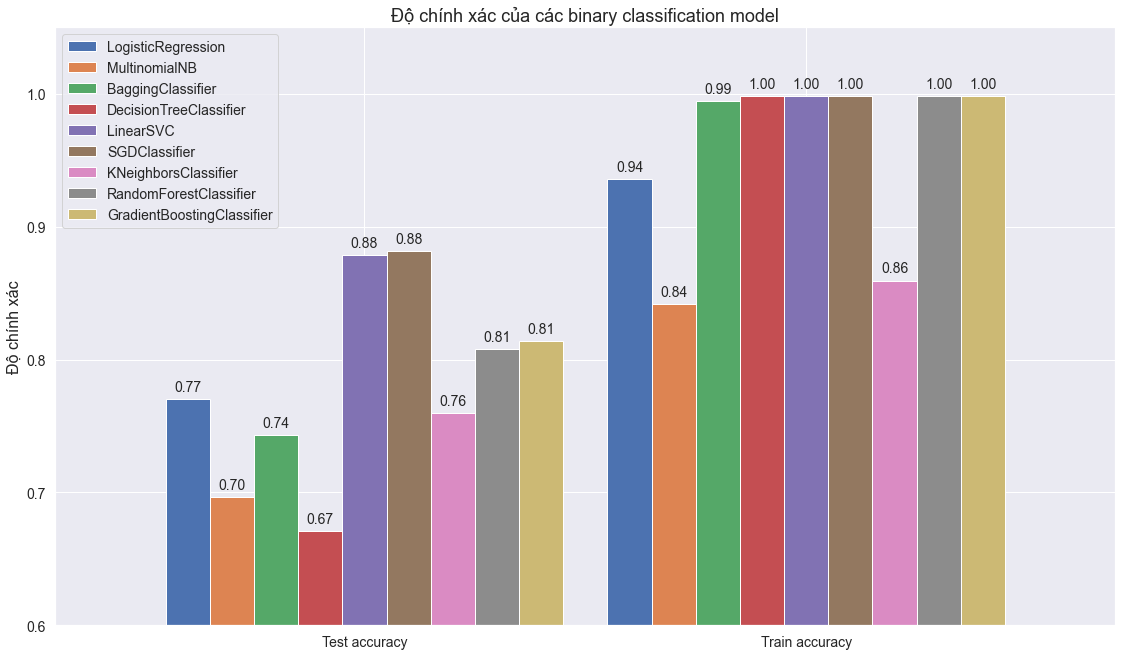

In [32]:
# visualize result dataframe
g1 = classification_result.T.plot(kind="bar", width=0.9, figsize=(19, 11))
plt.title("Độ chính xác của các binary classification model", fontsize=18)
plt.ylim(0.6,1.05)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
# plt.xlabel("Tiêu chuẩn đánh giá", fontsize=16)
# plt.text(2., 0.05, 'Tiêu chuẩn đánh giá', ha='center',fontsize=16)    # Xlabel
plt.ylabel("Độ chính xác", fontsize=16)

# show values
for c in g1.containers:
    labels = [f'{(v.get_height()):.2f}' for v in c]
    g1.bar_label(c, labels=labels, label_type='edge', padding=5, fontsize=14)
plt.show()

### **SVM model**

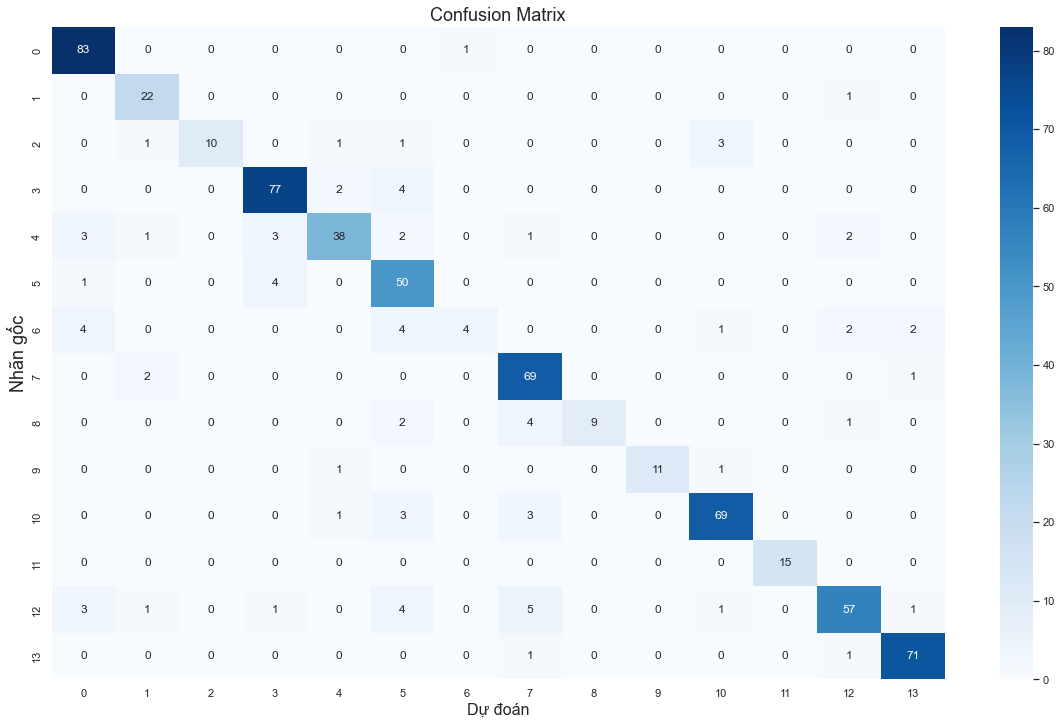

In [33]:
# svm model (top 1)
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)

y_test_pred = svm_model.predict(X_test)

# plot confusion matrix as a heatmap
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Dự đoán', fontsize=16)
plt.ylabel('Nhãn gốc', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [34]:
classification_report_results = classification_report(y_test, y_test_pred, target_names=list(label_encoder.classes_))
print(classification_report_results)

              precision    recall  f1-score   support

bat_dong_san       0.88      0.99      0.93        84
     du_lich       0.81      0.96      0.88        23
    giai_tri       1.00      0.62      0.77        16
    giao_duc       0.91      0.93      0.92        83
    goc_nhin       0.88      0.76      0.82        50
    khoa_hoc       0.71      0.91      0.80        55
  kinh_doanh       0.80      0.24      0.36        17
   phap_luat       0.83      0.96      0.89        72
      so_hoa       1.00      0.56      0.72        16
    suc_khoe       1.00      0.85      0.92        13
    the_gioi       0.92      0.91      0.91        76
    the_thao       1.00      1.00      1.00        15
     thoi_su       0.89      0.78      0.83        73
          xe       0.95      0.97      0.96        73

    accuracy                           0.88       666
   macro avg       0.90      0.82      0.84       666
weighted avg       0.88      0.88      0.87       666



In [ ]:
# classification_report_dict = classification_report(y_test, y_test_pred, target_names=list(label_encoder.classes_), 
#                                                    output_dict=True)
# df_classification_report = pd.DataFrame(classification_report_dict).transpose()
# df_classification_report

In [57]:
# build function visualize dataframe results
def plot_df_result(df,title, xlabel, ylabel):
    g = df.plot(kind="bar", width=0.8, figsize=(18, 8))
    plt.xticks(fontsize=16, rotation=0)
    plt.yticks(fontsize=16)
    plt.title(title, fontsize=18)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    plt.legend(fontsize=14)
    # show values
    for c in g.containers:
        labels = [f'{(v.get_height()):.2f}' for v in c]
        g.bar_label(c, labels=labels, label_type='edge', padding=5, fontsize=14)

In [52]:
# svm change C
top_1_results = pd.DataFrame(columns=['Precision', 'Recall', 'F1-score', 'Acc'], 
                                        index=["0.1", "0.5", "1.0", "4"])

for c in [0.1, 0.5, 1., 4]:
    
    top_1_model = LinearSVC(C=c).fit(X_train, y_train)

    # make predictions on the test set
    y_test_pred = top_1_model.predict(X_test)
    
    report_dict = classification_report(y_test, y_test_pred, target_names=list(label_encoder.classes_), 
                                                   output_dict=True)
    df_classification_report = pd.DataFrame(report_dict).transpose()
    precision = round(df_classification_report.iloc[15, 0].tolist(),2)
    recall = round(df_classification_report.iloc[15, 1].tolist(),2)
    f1_score = round(df_classification_report.iloc[15, 2].tolist(),2)
    acc = round(df_classification_report.iloc[14, 2].tolist(),2)
    
    # add results to dataframe
    top_1_results.loc[str(c), :] = [precision, recall, f1_score, acc]

In [63]:
print('Bảng so sánh các tiêu chí đánh giá của khi thay đổi siêu tham số C (SVM)')
top_1_results

Bảng so sánh các tiêu chí đánh giá của khi thay đổi siêu tham số C (SVM)


,Precision,Recall,F1-score,Acc
0.1,0.88,0.71,0.75,0.81
0.5,0.9,0.81,0.83,0.87
1.0,0.9,0.82,0.84,0.88
4,0.9,0.82,0.84,0.88


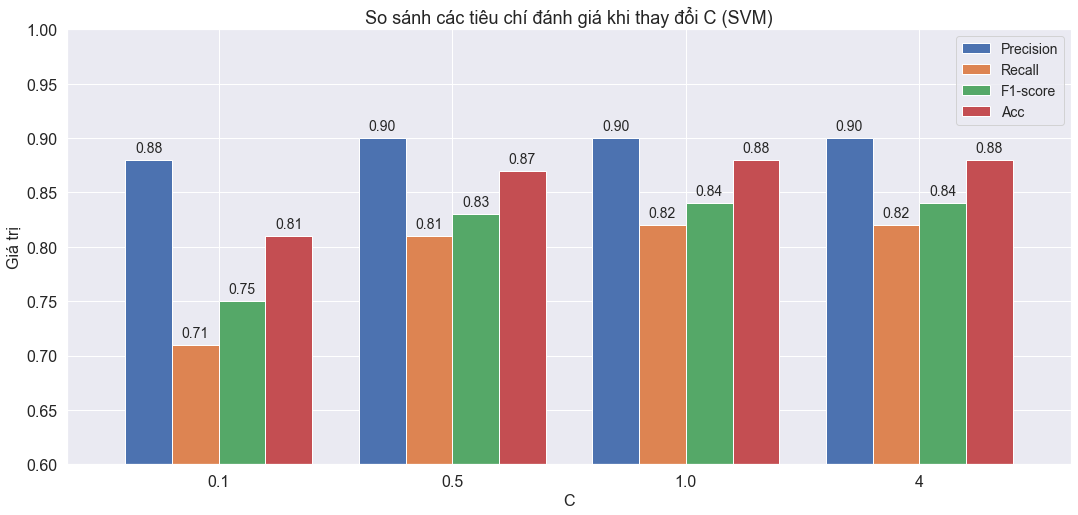

In [64]:
# plot result
plot_df_result(top_1_results,'So sánh các tiêu chí đánh giá khi thay đổi C (SVM)', 'C', 'Giá trị')
plt.ylim(0.6, 1)
plt.show()

*Note: C = 1.0

In [66]:
top_1_results2 = pd.DataFrame(columns=['Precision', 'Recall', 'F1-score', 'Acc'], 
                                        index=["hinge", "squared_hinge"])

for loss in ["hinge", "squared_hinge"]:
    
    top_1_model = LinearSVC(C=1, loss= loss).fit(X_train, y_train)

    # make predictions on the test set
    y_test_pred = top_1_model.predict(X_test)
    
    report_dict = classification_report(y_test, y_test_pred, target_names=list(label_encoder.classes_), 
                                                   output_dict=True)
    df_classification_report = pd.DataFrame(report_dict).transpose()
    precision = round(df_classification_report.iloc[15, 0].tolist(),2)
    recall = round(df_classification_report.iloc[15, 1].tolist(),2)
    f1_score = round(df_classification_report.iloc[15, 2].tolist(),2)
    acc = round(df_classification_report.iloc[14, 2].tolist(),2)
    
    # add results to dataframe
    top_1_results2.loc[loss, :] = [precision, recall, f1_score, acc]

In [67]:
print('Bảng so sánh các tiêu chí đánh giá của khi thay đổi siêu tham số Loss, C=1.0 (SVM)')
top_1_results2

Bảng so sánh các tiêu chí đánh giá của khi thay đổi siêu tham số Loss, C=1.0 (SVM)


,Precision,Recall,F1-score,Acc
hinge,0.9,0.82,0.83,0.87
squared_hinge,0.9,0.82,0.84,0.88


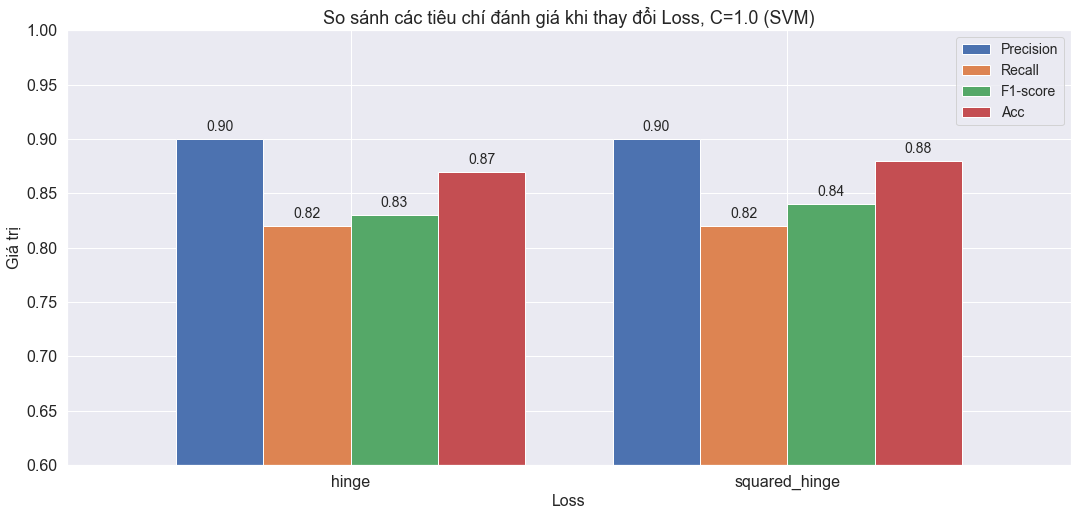

In [68]:
# plot result
plot_df_result(top_1_results2,'So sánh các tiêu chí đánh giá khi thay đổi Loss, C=1.0 (SVM)', 'Loss', 'Giá trị')
plt.ylim(0.6, 1)
plt.show()

*Note: Loss = squared_hinge

In [69]:
# training svm (c=1, loss=squared_hinge) model
svm_model = LinearSVC(C=1, loss= 'squared_hinge').fit(X_train, y_train)

# save svm model
pickle.dump(svm_model, open('./model/svm_model.pkl', 'wb'))

### **Stochastic gradient descent model**

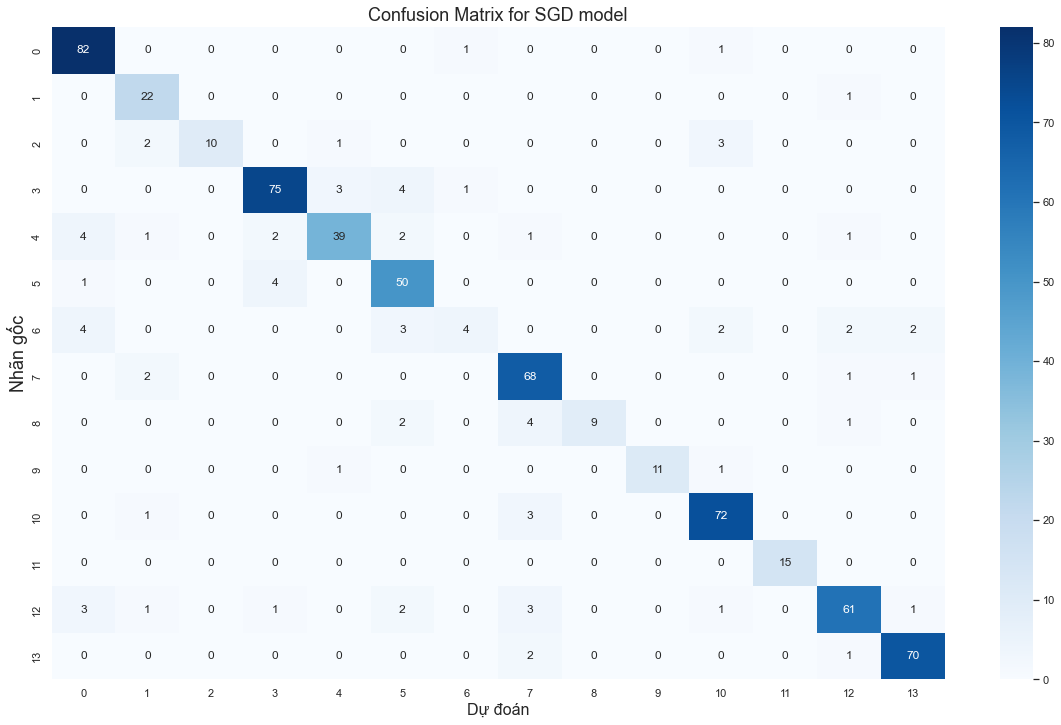

In [75]:
# stochastic gradient descent model
sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)

y_test_pred = sgd_model.predict(X_test)

# plot confusion matrix as a heatmap
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Dự đoán', fontsize=16)
plt.ylabel('Nhãn gốc', fontsize=18)
plt.title('Confusion Matrix for SGD model', fontsize=18)
plt.show()

In [76]:
classification_report_results2 = classification_report(y_test, y_test_pred, target_names=list(label_encoder.classes_))
print(classification_report_results2)

              precision    recall  f1-score   support

bat_dong_san       0.87      0.98      0.92        84
     du_lich       0.76      0.96      0.85        23
    giai_tri       1.00      0.62      0.77        16
    giao_duc       0.91      0.90      0.91        83
    goc_nhin       0.89      0.78      0.83        50
    khoa_hoc       0.79      0.91      0.85        55
  kinh_doanh       0.67      0.24      0.35        17
   phap_luat       0.84      0.94      0.89        72
      so_hoa       1.00      0.56      0.72        16
    suc_khoe       1.00      0.85      0.92        13
    the_gioi       0.90      0.95      0.92        76
    the_thao       1.00      1.00      1.00        15
     thoi_su       0.90      0.84      0.87        73
          xe       0.95      0.96      0.95        73

    accuracy                           0.88       666
   macro avg       0.89      0.82      0.84       666
weighted avg       0.88      0.88      0.88       666



In [ ]:
# sgd change loss
top_2_results = pd.DataFrame(columns=['Precision', 'Recall', 'F1-score', 'Acc'], 
                                    index=["hinge", "log_loss", "modified_huber", "squared_error"])

for loss in ["hinge", "log_loss", "modified_huber", "squared_error"]:
    
    top_2_model = SGDClassifier(loss=loss).fit(X_train, y_train)

    # make predictions on the test set
    y_test_pred = top_2_model.predict(X_test)
    
    report_dict = classification_report(y_test, y_test_pred, target_names=list(label_encoder.classes_), 
                                                   output_dict=True)
    df_classification_report = pd.DataFrame(report_dict).transpose()
    precision = round(df_classification_report.iloc[15, 0].tolist(),2)
    recall = round(df_classification_report.iloc[15, 1].tolist(),2)
    f1_score = round(df_classification_report.iloc[15, 2].tolist(),2)
    acc = round(df_classification_report.iloc[14, 2].tolist(),2)
    
    # add results to dataframe
    top_2_results.loc[loss, :] = [precision, recall, f1_score, acc]

In [80]:
print('So sánh các tiêu chí đánh giá khi thay đổi Loss (SGD)')
top_2_results

So sánh các tiêu chí đánh giá khi thay đổi Loss (SGD)


,Precision,Recall,F1-score,Acc
hinge,0.88,0.82,0.83,0.88
log_loss,0.89,0.8,0.82,0.86
modified_huber,0.88,0.81,0.83,0.86
squared_error,0.06,0.12,0.06,0.12


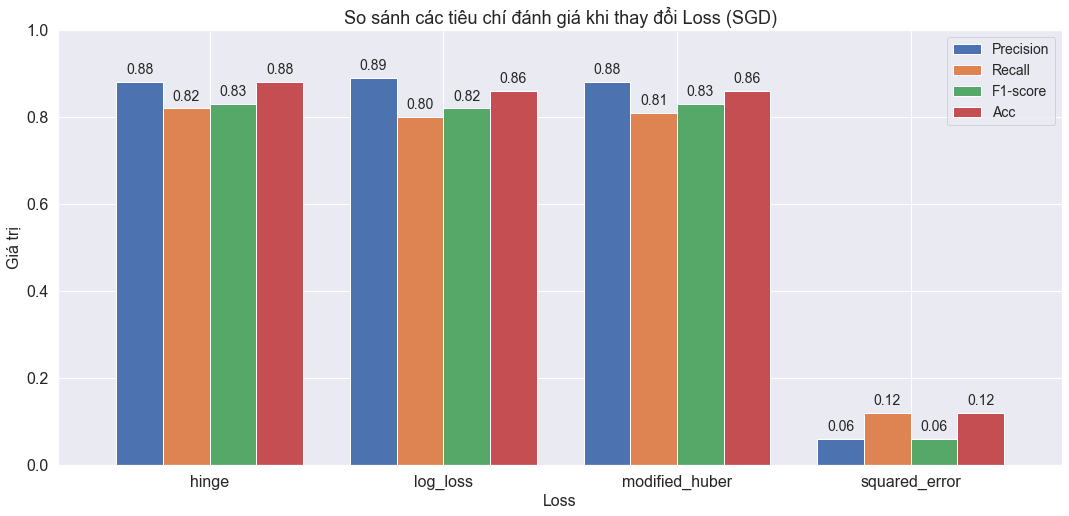

In [82]:
# plot result
plot_df_result(top_2_results,'So sánh các tiêu chí đánh giá khi thay đổi Loss (SGD)', 'Loss', 'Giá trị')
plt.ylim(0, 1)
plt.show()

*Note: Loss = hinge

In [84]:
# sgd change penalty
top_2_results2 = pd.DataFrame(columns=['Precision', 'Recall', 'F1-score', 'Acc'], 
                                    index=["l1", "l2", "elasticnet"])

for p in ["l1", "l2", "elasticnet"]:
    
    top_2_model = SGDClassifier(penalty=p).fit(X_train, y_train)

    # make predictions on the test set
    y_test_pred = top_2_model.predict(X_test)
    
    report_dict = classification_report(y_test, y_test_pred, target_names=list(label_encoder.classes_), 
                                                   output_dict=True)
    df_classification_report = pd.DataFrame(report_dict).transpose()
    precision = round(df_classification_report.iloc[15, 0].tolist(),2)
    recall = round(df_classification_report.iloc[15, 1].tolist(),2)
    f1_score = round(df_classification_report.iloc[15, 2].tolist(),2)
    acc = round(df_classification_report.iloc[14, 2].tolist(),2)
    
    # add results to dataframe
    top_2_results2.loc[p, :] = [precision, recall, f1_score, acc]

In [86]:
print('So sánh các tiêu chí đánh giá khi thay đổi Penalty, Loss=hinge (SGD)')
top_2_results2

So sánh các tiêu chí đánh giá khi thay đổi Penalty, Loss=hinge (SGD)


,Precision,Recall,F1-score,Acc
l1,0.86,0.81,0.82,0.86
l2,0.88,0.82,0.83,0.88
elasticnet,0.88,0.81,0.83,0.87


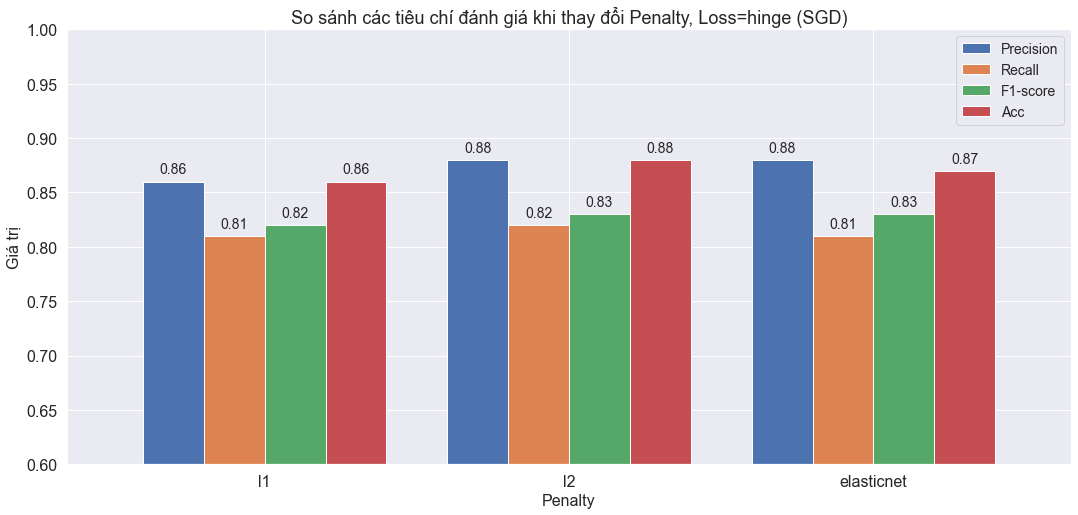

In [87]:
# plot result
plot_df_result(top_2_results2,'So sánh các tiêu chí đánh giá khi thay đổi Penalty, Loss=hinge (SGD)', 'Penalty', 'Giá trị')
plt.ylim(0.6, 1)
plt.show()

*Note: Penalty = l2

In [88]:
# training sgd (loss=hinge, penalty=l2) model
sgd_model = SGDClassifier(loss= 'hinge', penalty='l2').fit(X_train, y_train)

# save sgd model
pickle.dump(sgd_model, open('./model/sgd_model.pkl', 'wb'))

### **Final result**

In [96]:
# load svm model
pickled_svm_model = pickle.load(open('./model/svm_model.pkl', 'rb'))

# load sgd model
pickled_sgd_model = pickle.load(open('./model/sgd_model.pkl', 'rb'))

final_result = pd.DataFrame(columns=['Precision', 'Recall', 'F1-score', 'Acc'], 
                                index=["SVM (c=1, loss=squared_hinge)", "SGD (loss=hinge, penalty=l2)"])
for i, model in enumerate([pickled_svm_model, pickled_sgd_model]):
    # make predictions on the test set
    y_test_pred = model.predict(X_test)

    report_dict = classification_report(y_test, y_test_pred, target_names=list(label_encoder.classes_), 
                                                    output_dict=True)
    df_classification_report = pd.DataFrame(report_dict).transpose()
    precision = round(df_classification_report.iloc[15, 0].tolist(),2)
    recall = round(df_classification_report.iloc[15, 1].tolist(),2)
    f1_score = round(df_classification_report.iloc[15, 2].tolist(),2)
    acc = round(df_classification_report.iloc[14, 2].tolist(),2)

    # add results to dataframe
    final_result.loc[final_result.index[i], :] = [precision, recall, f1_score, acc]

In [134]:
print('So sánh các tiêu chí đánh giá của mô hình SVM và SGD')
final_result

So sánh các tiêu chí đánh giá của mô hình SVM và SGD


,Precision,Recall,F1-score,Acc
"SVM (c=1, loss=squared_hinge)",0.9,0.82,0.84,0.88
"SGD (loss=hinge, penalty=l2)",0.88,0.81,0.83,0.88


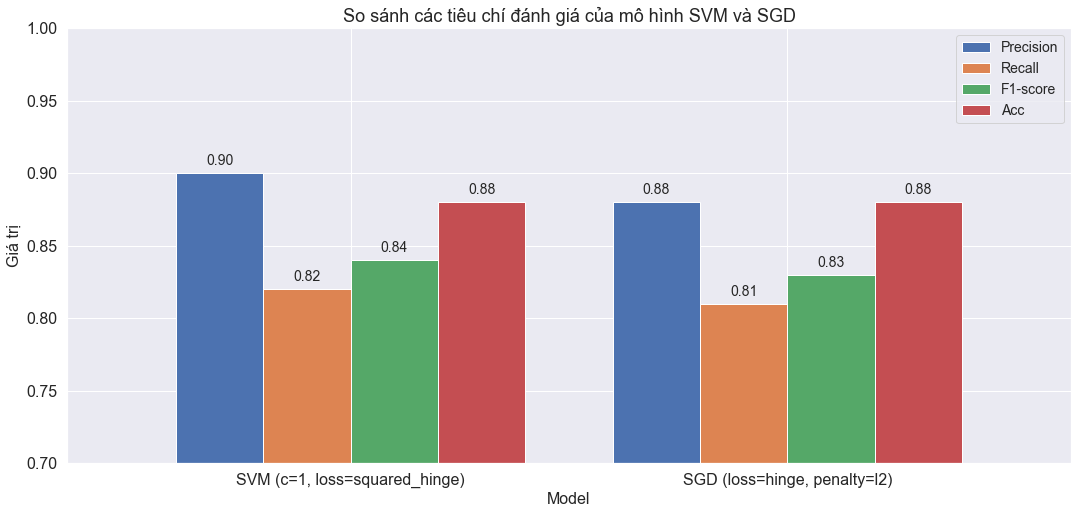

In [101]:
# plot result
plot_df_result(final_result,'So sánh các tiêu chí đánh giá của mô hình SVM và SGD', 'Model', 'Giá trị')
plt.ylim(0.7, 1)
plt.show()

In [128]:
# app_df = pd.DataFrame(data=data_preprocessed.toarray(), columns=data_preprocess.named_steps['vect'].get_feature_names_out())
# y_app = label_encoder.transform(df['label'])
# app_df['label'] = y_app

# # save data preprocessed
# app_df.to_csv('./data/tfidf_data.csv', index=False)

### **Prediction new articles**

In [178]:
# new articles
news = '''Các nhà khoa học tìm thấy ngọn núi khổng lồ dưới Thái Bình Dương với chiều cao khoảng 1.600 m, gấp đôi Burj Khalifa, tòa nhà cao nhất thế giới.
Ngọn núi ngầm cao 1.600 m so với đáy biển và nằm ở độ sâu khoảng 4.000 m dưới mực nước biển. Các chuyên gia phát hiện nó trong chuyến thám hiểm do Viện Đại dương Schmidt (SOI) tiến hành ở vùng biển quốc tế, cách vùng đặc quyền kinh tế của Guatemala 135 km.

Núi ngầm là những ngọn núi dưới nước với các sườn dốc nhô lên từ đáy đại dương, theo Cơ quan Khí quyển và Đại dương Quốc gia Mỹ (NOAA). Đa số núi ngầm là tàn tích của các núi lửa đã tắt và thường có hình nón. Núi ngầm hiện diện ở mọi bồn trũng đại dương trên thế giới, nhưng giới chuyên gia không rõ chính xác số lượng. Số núi ngầm cao ít nhất 1.000 m được cho là nhiều hơn 100.000. Nhưng đến nay, các nhà khoa học mới chỉ phát hiện một phần nhỏ trong số đó.

Núi ngầm mới được đoàn thám hiểm SOI quan sát bằng cách sử dụng Máy đo hồi âm đa tia EM124 trên tàu nghiên cứu Falkor (too). Thiết bị này có khả năng lập bản đồ đáy biển với độ phân giải cao.

Sau khi máy đo hồi âm phát hiện núi ngầm, một chuyên gia trên tàu đã xác nhận cấu trúc này chưa có trong bất cứ cơ sở dữ liệu đáy biển nào. Dữ liệu cho thấy ngọn núi có diện tích hơn 13 km2. "Việc một núi ngầm cao hơn 1,5 km giấu mình dưới những con sóng đến tận bây giờ cho thấy, vẫn còn rất nhiều điều mà chúng ta chưa khám phá", Jyotika Virmani, giám đốc điều hành tại SOI, cho biết.

Núi ngầm là những "điểm nóng" về đa dạng sinh học, cung cấp bề mặt cho các sinh vật như san hô biển sâu, bọt biển và nhiều loài động vật không xương sống định cư và phát triển. Những sinh vật này lại tiếp tục cung cấp thức ăn cho động vật khác. Hệ sinh thái núi ngầm thường là nơi cư trú của những loài độc nhất vô nhị, chỉ được tìm thấy ở một địa điểm duy nhất. Lập bản đồ và khám phá những khu vực chưa biết dưới đáy biển là yếu tố then chốt giúp giới khoa học hiểu rõ Trái Đất hơn.

SOI là một đối tác trong chương trình Seabed 2030 với mục tiêu lập bản đồ toàn bộ đáy biển vào năm 2030. Hiện tại, tình trạng thiếu bản đồ chi tiết của phần lớn đáy biển gây khó khăn cho việc điều hướng tàu thuyền an toàn, quản lý tài nguyên biển một cách bền vững và bảo vệ các cộng đồng ven biển.'''

# data clean
clean_news = data_clean(news)
clean_news

'nhà_khoa_học núi khổng_lồ thái_bình_dương chiều 1600 m gấp đôi burj khalifa tòa thế_giới núi ngầm 1600 m đáy biển nằm độ sâu 4000 m mực nước_biển chuyên_gia phát_hiện chuyến thám_hiểm viện đại_dương schmidt soi tiến_hành vùng_biển quốc_tế đặc_quyền kinh_tế guatemala 135 km núi ngầm núi sườn dốc nhô đáy đại_dương cơ_quan khí_quyển đại_dương quốc_gia mỹ noaa đa_số núi ngầm tàn_tích núi_lửa tắt hình_nón núi ngầm hiện_diện bồn trũng đại_dương thế_giới giới chuyên_gia chính_xác số_lượng _số núi ngầm 1000 m 100000 nhà_khoa_học phát_hiện núi ngầm đoàn thám_hiểm soi quan_sát máy đo hồi_âm đa tia em124 tàu nghiên_cứu falkor too thiết_bị khả_năng lập bản_đồ đáy biển độ phân_giải máy đo hồi_âm phát_hiện núi ngầm chuyên_gia tàu xác_nhận cấu_trúc cơ_sở dữ_liệu đáy biển _dữ_liệu núi diện_tích 13 km2 núi ngầm 15 km giấu sóng tận khám_phá jyotika virmani giám_đốc điều_hành soi núi ngầm điểm_nóng đa_dạng_sinh_học cung_cấp bề_mặt sinh_vật san_hô biển sâu bọt_biển loài động_vật xương sống định_cư phát_t

In [179]:
tfidf_preprocessed = data_preprocess.transform([clean_news])
predict = pickled_svm_model.predict(tfidf_preprocessed)
print('Predict label: ', label_encoder.inverse_transform(predict)[0])

Predict label:  khoa_hoc
